<a href="https://colab.research.google.com/github/springboardmentor1979b-cmyk/ScoreSight---Predicting-EPL-Points-Tally-Top-Scorer/blob/Tanisha-Bhowmik/tanisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/infosys internship/dataset - 2020-09-24.csv')
df.head()


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [ ]:
df.shape

(571, 59)

In [ ]:
df.tail()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
570,Leonardo Campana,30.0,Wolverhampton-Wanderers,Forward,Ecuador,20.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [ ]:
df.describe()

,Jersey Number,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
count,563.000000,570.000000,571.000000,571.000000,571.000000,571.000000,309.000000,502.000000,502.000000,502.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,571.000000,571.000000,571.000000,502.000000
mean,19.534636,25.789474,68.823117,28.957968,23.896673,7.327496,2.648414,1.414343,4.468127,2.388446,...,24.652174,45.869565,20.782609,25.565217,210.000000,414.144928,7.917688,0.301226,53.033275,11.063745
std,14.273515,4.377354,81.797516,38.969376,28.488376,16.810490,8.002117,3.433374,11.048341,6.295652,...,46.282644,82.332167,43.058397,47.333758,334.822473,641.246265,11.556811,0.698607,75.605560,26.570058
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,22.000000,3.000000,1.000000,1.000000,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,26.000000,36.000000,12.000000,14.000000,1.000000,0.140000,0.000000,1.000000,0.000000,...,2.000000,6.000000,3.000000,4.000000,39.000000,53.000000,3.000000,0.000000,22.000000,2.000000
75%,27.000000,29.000000,108.000000,41.000000,36.000000,6.000000,0.390000,1.000000,3.000000,2.000000,...,31.000000,45.000000,17.000000,28.000000,300.000000,527.000000,11.000000,0.000000,74.000000,8.750000
max,82.000000,38.000000,539.000000,272.000000,158.000000,180.000000,57.000000,31.000000,127.000000,63.000000,...,269.000000,391.000000,249.000000,257.000000,1516.000000,2806.000000,81.000000,5.000000,438.000000,203.000000


In [ ]:
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


week **4**


In [ ]:
(df['Shots'] == 0).sum()
#to check the missing values




np.int64(44)

In [ ]:

(df['Assists'] == 0).sum()


np.int64(239)

In [ ]:
(df['Shots'] == 0).sum()


np.int64(44)

In [ ]:
(df['Position'] == 0).sum()

np.int64(0)

In [ ]:
important_cols = ['Goals', 'Assists', 'Shots', 'Appearances']

for col in important_cols:
    df[col] = df[col].replace(0, pd.NA)
    df[col] = df[col].fillna(df[col].mean())


/tmp/ipython-input-1146616245.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mean())


In [ ]:
df.head()



,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64.000000,28,16,13.198738,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,81.700624,0,0,13.198738,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,81.700624,0,0,13.198738,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160.000000,90,37,7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16.000000,7,5,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [ ]:
df.isnull()



,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
569,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False


In [ ]:
df.isnull().sum()


,0
Name,0
Jersey Number,8
Club,0
Position,0
Nationality,1
Age,1
Appearances,0
Wins,0
Losses,0
Goals,0


In [ ]:
df.isna().sum()


,0
Name,0
Jersey Number,8
Club,0
Position,0
Nationality,1
Age,1
Appearances,0
Wins,0
Losses,0
Goals,0


1. checking columns


In [ ]:
df.columns


Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

2.Identifying the Relevent and Irrelevent columns



In [ ]:
useful_columns = ['Goals', 'Assists', 'Appearances', 'Shots', 'Accuracy']
print("Useful Columns:", useful_columns)

irrelevant_columns = ['Jersey Number', 'Nationality', 'Player ID', 'Photo URL']
print("Irrelevant Columns:", irrelevant_columns)



Useful Columns: ['Goals', 'Assists', 'Appearances', 'Shots', 'Accuracy']
Irrelevant Columns: ['Jersey Number', 'Nationality', 'Player ID', 'Photo URL']


3.Handelling The Missing Values and replace it With Mean



In [ ]:
important_cols = ['Goals', 'Assists', 'Shots', 'Appearances']

for col in important_cols:
    df[col] = df[col].replace(0, pd.NA)
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
import numpy as np

DISCRETE_NUMERICAL = [
    'Saves',
    'Penalties saved',
    'Punches',
    'High Claims',
    'Catches',
    'Sweeper clearances',
    'Throw outs',
    'Goal Kicks',
    'Yellow cards',
    'Red cards',
    'Fouls',
    'Offsides'
]

# Keep only columns that exist in df and are numeric
DISCRETE_NUMERICAL = [
    col for col in DISCRETE_NUMERICAL
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col])
]

# Replace 0 with mean values
for col in DISCRETE_NUMERICAL:
    column_mean = df[col].replace(0, np.nan).mean()
    df[col] = df[col].replace(0, np.nan).fillna(column_mean)

print("\n--- Final Cleaned Data Verification (first 5 rows) ---")
print(df.head())

print(f"\nTotal remaining missing values across all columns: {df.isnull().sum().sum()}")



--- Final Cleaned Data Verification (first 5 rows) ---
                   Name  Jersey Number     Club    Position Nationality   Age  \
0            Bernd Leno            1.0  Arsenal  Goalkeeper     Germany  28.0   
1            Matt Macey           33.0  Arsenal  Goalkeeper     England  26.0   
2  Rúnar Alex Rúnarsson           13.0  Arsenal  Goalkeeper     Iceland  25.0   
3       Héctor Bellerín            2.0  Arsenal    Defender       Spain  25.0   
4        Kieran Tierney            3.0  Arsenal    Defender    Scotland  23.0   

   Appearances  Wins  Losses      Goals  ...    Punches  High Claims  \
0    64.000000    28      16  13.198738  ...  34.000000    26.000000   
1    81.700624     0       0  13.198738  ...  43.615385    77.195122   
2    81.700624     0       0  13.198738  ...  43.615385    77.195122   
3   160.000000    90      37   7.000000  ...  43.615385    77.195122   
4    16.000000     7       5   1.000000  ...  43.615385    77.195122   

     Catches  Sweeper cl

4.Cleaned Dataset


In [ ]:
import numpy as np
import pandas as pd

count_columns_to_fill_zero = [
    'Goals', 'Assists', 'Shots', 'Tackles', 'Saves',
    'Punches', 'High Claims', 'Offsides',
    'Jersey Number', 'Age'
]

rate_columns_to_fill_mean = [
    'Goals per match',
    'Shooting accuracy %',
    'Tackle success %',
    'Cross accuracy %',
    'Passes per match'
]

# ----------------------------
# 1️⃣ Fill count-type columns with ZERO
# ----------------------------
for col in count_columns_to_fill_zero:
    if col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(0).astype(int)
        else:
            df[col] = (
                pd.to_numeric(df[col], errors='coerce')
                .fillna(0)
                .astype(int)
            )

# ----------------------------
# 2️⃣ Fill rate-type columns with MEAN
# ----------------------------
for col in rate_columns_to_fill_mean:
    if col in df.columns:

        # Convert % columns properly
        if df[col].dtype == "object":
            df[col] = df[col].str.replace('%', '', regex=False)
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # Convert accuracy % columns (e.g., 75 → 0.75)
        if "accuracy" in col.lower() or "success" in col.lower():
            df[col] = df[col] / 100

        # Always compute mean AFTER converting
        col_mean = df[col].mean()

        # Fill missing with mean
        df[col] = df[col].fillna(col_mean)

# ----------------------------
# 3️⃣ Fill discrete numeric columns (your previous list)
# ----------------------------
for col in DISCRETE_NUMERICAL:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0).astype(int)

print("Dataset cleaning complete. NaN values should now be properly handled.\n")
print(f"Total remaining missing values: {df.isnull().sum().sum()}\n")
print(df.head())


Dataset cleaning complete. NaN values should now be properly handled.

Total remaining missing values: 4913

                   Name  Jersey Number     Club    Position Nationality  Age  \
0            Bernd Leno              1  Arsenal  Goalkeeper     Germany   28   
1            Matt Macey             33  Arsenal  Goalkeeper     England   26   
2  Rúnar Alex Rúnarsson             13  Arsenal  Goalkeeper     Iceland   25   
3       Héctor Bellerín              2  Arsenal    Defender       Spain   25   
4        Kieran Tierney              3  Arsenal    Defender    Scotland   23   

   Appearances  Wins  Losses  Goals  ...  Punches  High Claims  Catches  \
0    64.000000    28      16     13  ...       34           26       17   
1    81.700624     0       0     13  ...       43           77       36   
2    81.700624     0       0     13  ...       43           77       36   
3   160.000000    90      37      7  ...       43           77       36   
4    16.000000     7       5      1

In [ ]:
print(df.head())


                   Name  Jersey Number     Club    Position Nationality  Age  \
0            Bernd Leno              1  Arsenal  Goalkeeper     Germany   28   
1            Matt Macey             33  Arsenal  Goalkeeper     England   26   
2  Rúnar Alex Rúnarsson             13  Arsenal  Goalkeeper     Iceland   25   
3       Héctor Bellerín              2  Arsenal    Defender       Spain   25   
4        Kieran Tierney              3  Arsenal    Defender    Scotland   23   

   Appearances  Wins  Losses  Goals  ...  Punches  High Claims  Catches  \
0    64.000000    28      16     13  ...       34           26       17   
1    81.700624     0       0     13  ...       43           77       36   
2    81.700624     0       0     13  ...       43           77       36   
3   160.000000    90      37      7  ...       43           77       36   
4    16.000000     7       5      1  ...       43           77       36   

   Sweeper clearances  Throw outs  Goal Kicks  Yellow cards  Red car

In [ ]:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           571 non-null    int64  
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     571 non-null    int64  
 6   Appearances             571 non-null    float64
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         571 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

5.Categorizing The Columns



In [ ]:

# ------------------------------
print("Mounted at /content/drive")



# Identify categorical/identifier columns
categorical_cols = [
    'Name', 'Jersey Number', 'Club', 'Position', 'Nationality'
]

# Discrete numerical (integer-like) → counts, stats, appearances, ratings
discrete_cols = [
    col for col in df.columns
    if df[col].dtype != 'object' and col not in categorical_cols
]

# Continuous numerical (float ranges like percentages and rates)
continuous_cols = [
    col for col in df.columns
    if df[col].dtype != 'object'
    and df[col].dtype != 'int64'
    and col not in categorical_cols
    and col not in discrete_cols
]



print(f"Total Columns: {len(df.columns)}")
print(f"Categorical/Identifiers: {len(categorical_cols)}")
print(f"Discrete Numerical (Counts): {len(discrete_cols)}")
print(f"Continuous Numerical (Rates): {len(continuous_cols)}\n")



print("Data types for Categorical Columns:")
print(df[categorical_cols].dtypes)


Mounted at /content/drive
Total Columns: 59
Categorical/Identifiers: 5
Discrete Numerical (Counts): 54
Continuous Numerical (Rates): 0

Data types for Categorical Columns:
Name             object
Jersey Number     int64
Club             object
Position         object
Nationality      object
dtype: object



# WEEK 5

HOMEWORK 1

In [ ]:
import matplotlib.pyplot as plt


Histogram — Goals vs Frequency

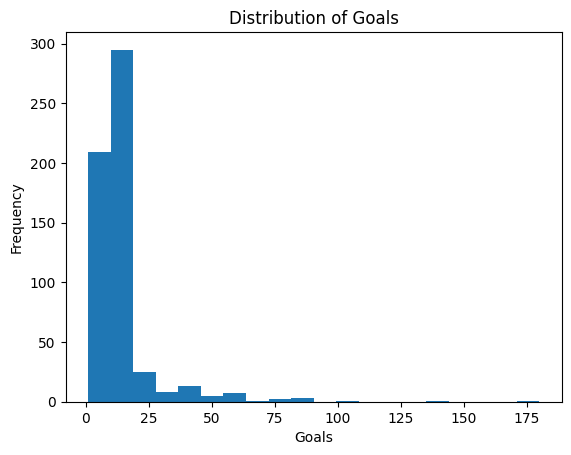

In [ ]:
plt.figure()
plt.hist(df['Goals'], bins=20)
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Goals')
plt.show()


Scatter — Appearances vs Goals

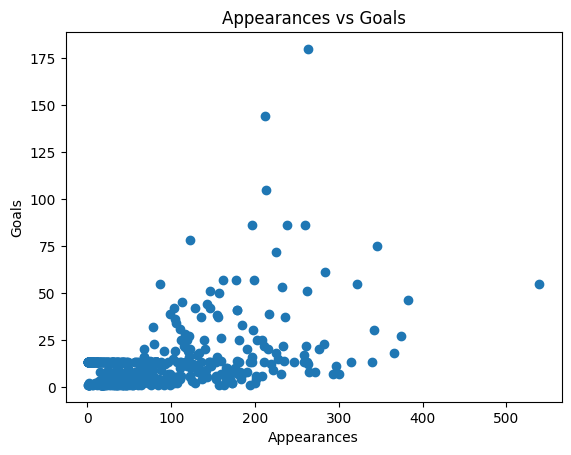

In [ ]:
plt.figure()
plt.scatter(df['Appearances'], df['Goals'])
plt.xlabel('Appearances')
plt.ylabel('Goals')
plt.title('Appearances vs Goals')
plt.show()


Scatter — Age vs Goals

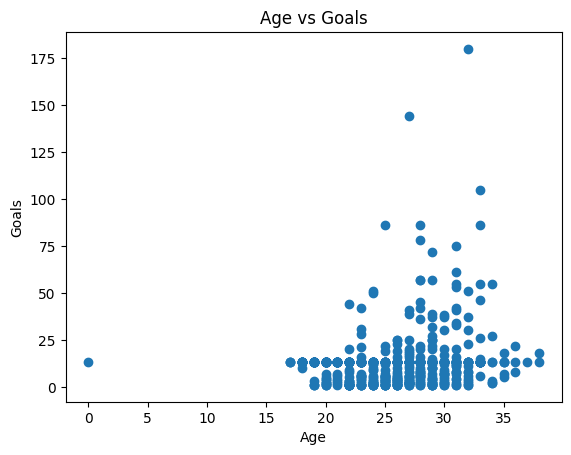

In [ ]:
plt.figure()
plt.scatter(df['Age'], df['Goals'])
plt.xlabel('Age')
plt.ylabel('Goals')
plt.title('Age vs Goals')
plt.show()


Bar Chart — Club vs Goals (SUM)

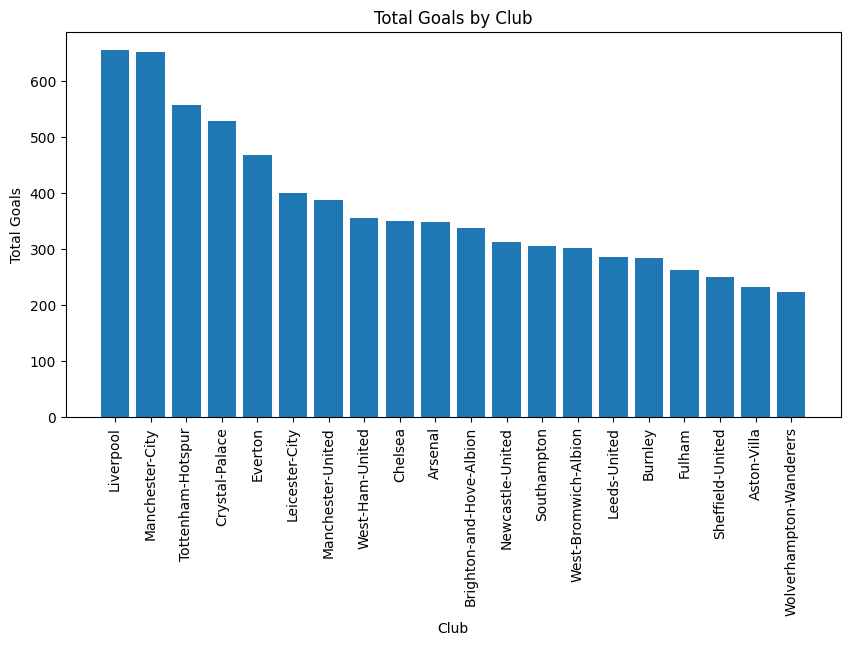

In [ ]:
club_goals = df.groupby('Club')['Goals'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.bar(club_goals.index, club_goals.values)
plt.xlabel('Club')
plt.ylabel('Total Goals')
plt.title('Total Goals by Club')
plt.xticks(rotation=90)
plt.show()


Bar Chart — Position vs Goals (AVERAGE)

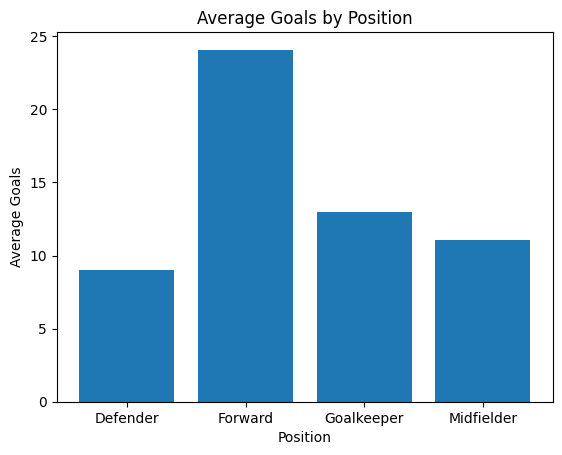

In [ ]:
position_avg_goals = df.groupby('Position')['Goals'].mean()

plt.figure()
plt.bar(position_avg_goals.index, position_avg_goals.values)
plt.xlabel('Position')
plt.ylabel('Average Goals')
plt.title('Average Goals by Position')
plt.show()


Scatter — Shots vs Goals

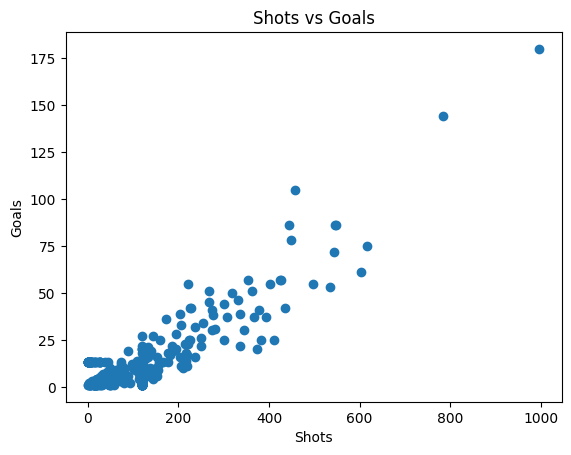

In [ ]:
plt.figure()
plt.scatter(df['Shots'], df['Goals'])
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.title('Shots vs Goals')
plt.show()


Scatter — Assists vs Goals

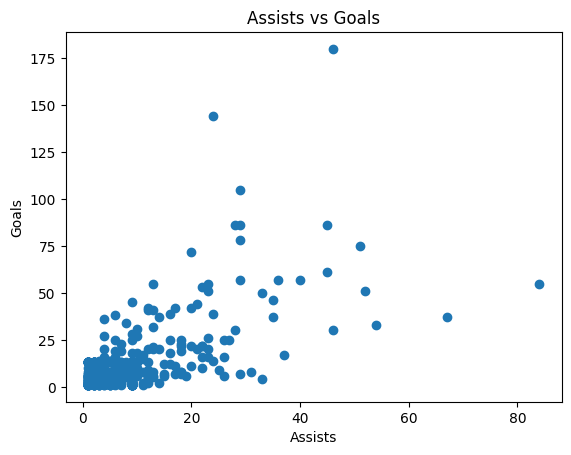

In [ ]:
plt.figure()
plt.scatter(df['Assists'], df['Goals'])
plt.xlabel('Assists')
plt.ylabel('Goals')
plt.title('Assists vs Goals')
plt.show()


Scatter — Passes vs Assists

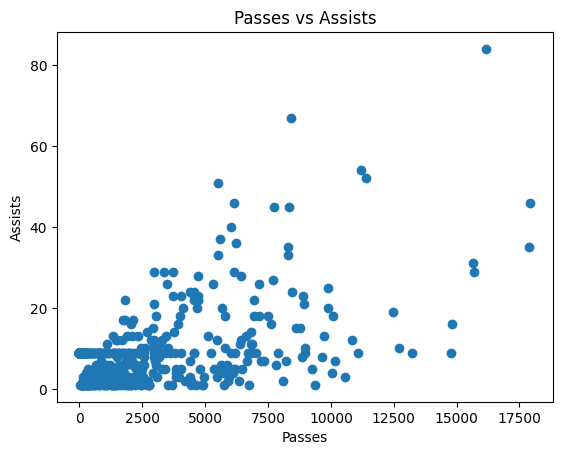

In [ ]:
plt.figure()
plt.scatter(df['Passes'], df['Assists'])
plt.xlabel('Passes')
plt.ylabel('Assists')
plt.title('Passes vs Assists')
plt.show()


Scatter — Tackles vs Tackle Success %

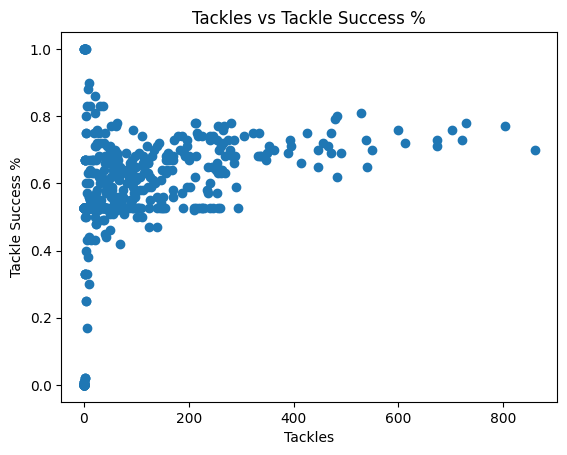

In [ ]:
plt.figure()
plt.scatter(df['Tackles'], df['Tackle success %'])
plt.xlabel('Tackles')
plt.ylabel('Tackle Success %')
plt.title('Tackles vs Tackle Success %')
plt.show()


Bar Chart — Nationality vs Goals (SUM)

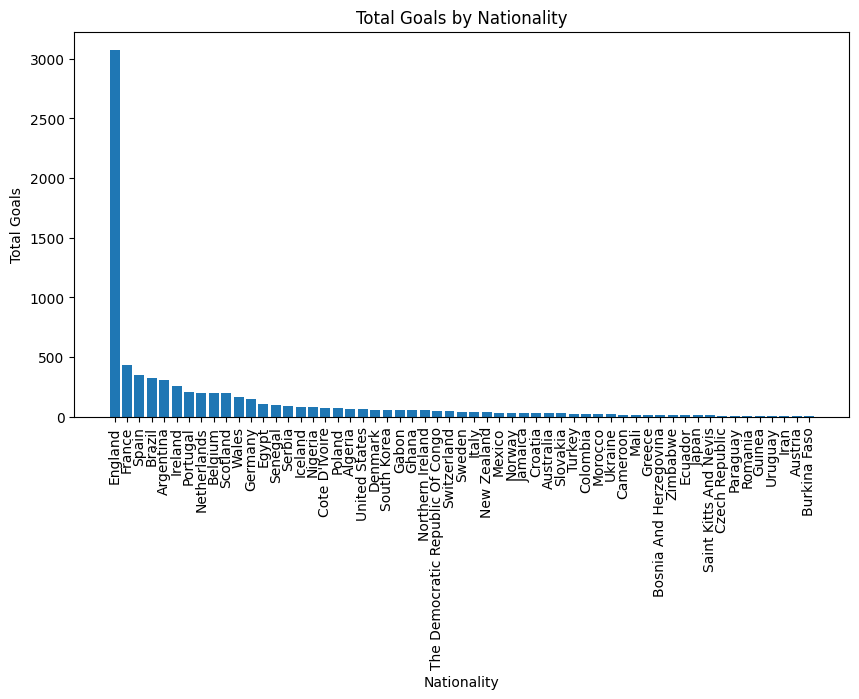

In [126]:
nationality_goals = df.groupby('Nationality')['Goals'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.bar(nationality_goals.index, nationality_goals.values)
plt.xlabel('Nationality')
plt.ylabel('Total Goals')
plt.title('Total Goals by Nationality')
plt.xticks(rotation=90)
plt.show()


Homework 2 — Feature Scaling

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler


Print raw values
Columns: Goals, Appearances, Passes

In [128]:
print("🔹 Raw Values (First 10 rows):")
print(df[['Goals', 'Appearances', 'Passes']].head(10))
#This shows the original, unscaled data.

🔹 Raw Values (First 10 rows):
   Goals  Appearances  Passes
0     13    64.000000    1783
1     13    81.700624       0
2     13    81.700624       0
3      7   160.000000    7125
4      1    16.000000     519
5     13    81.700624       0
6      3    44.000000    2416
7     13    41.000000    2200
8      7    99.000000    5907
9      6   139.000000    5935


 Min-Max Scaling

 Xscaled​= (X-Xmin)/(Xmax-Xmin)

In [129]:
minmax_cols = ['Goals', 'Appearances', 'Passes', 'Assists']

minmax_scaler = MinMaxScaler()

df_minmax = df.copy()
df_minmax[minmax_cols] = minmax_scaler.fit_transform(df[minmax_cols])

print("\n🔹 Min-Max Scaled Values (First 10 rows):")
print(df_minmax[minmax_cols].head(10))



🔹 Min-Max Scaled Values (First 10 rows):
      Goals  Appearances    Passes   Assists
0  0.067039     0.117100  0.099431  0.096386
1  0.067039     0.150001  0.000000  0.096386
2  0.067039     0.150001  0.000000  0.096386
3  0.033520     0.295539  0.397334  0.204819
4  0.000000     0.027881  0.028943  0.000000
5  0.067039     0.150001  0.000000  0.096386
6  0.011173     0.079926  0.134731  0.012048
7  0.067039     0.074349  0.122686  0.096386
8  0.033520     0.182156  0.329411  0.036145
9  0.027933     0.256506  0.330973  0.024096


Standardization (Z-Score Scaling)

Z=(X−μ​)// σ

In [130]:
standard_cols = ['Goals', 'Shots', 'Passes']

standard_scaler = StandardScaler()

df_standard = df.copy()
df_standard[standard_cols] = standard_scaler.fit_transform(df[standard_cols])

print("\n🔹 Standardized Values (First 10 rows):")
print(df_standard[standard_cols].head(10))



🔹 Standardized Values (First 10 rows):
      Goals     Shots    Passes
0 -0.007136 -0.002388 -0.168573
1 -0.007136 -0.002388 -0.739227
2 -0.007136 -0.002388 -0.739227
3 -0.395174 -0.002388  1.541148
4 -0.783212 -0.002388 -0.573119
5 -0.007136 -0.002388 -0.739227
6 -0.653866 -0.002388  0.034020
7 -0.007136 -0.002388 -0.035111
8 -0.395174 -0.002388  1.151324
9 -0.459847 -0.002388  1.160285


Scatter Plots
Before Scaling vs After Scaling

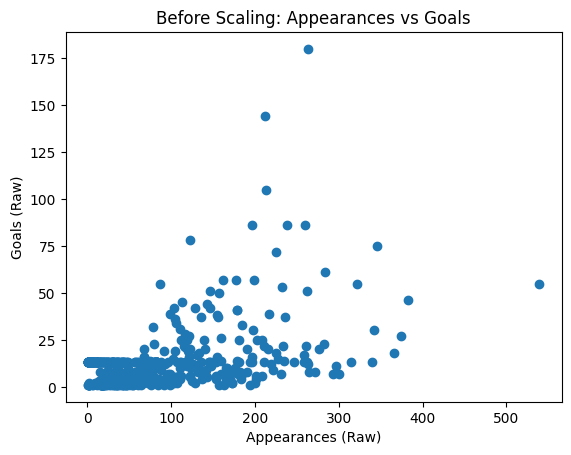

In [131]:
#before scaling
plt.figure()
plt.scatter(df['Appearances'], df['Goals'])
plt.xlabel('Appearances (Raw)')
plt.ylabel('Goals (Raw)')
plt.title('Before Scaling: Appearances vs Goals')
plt.show()


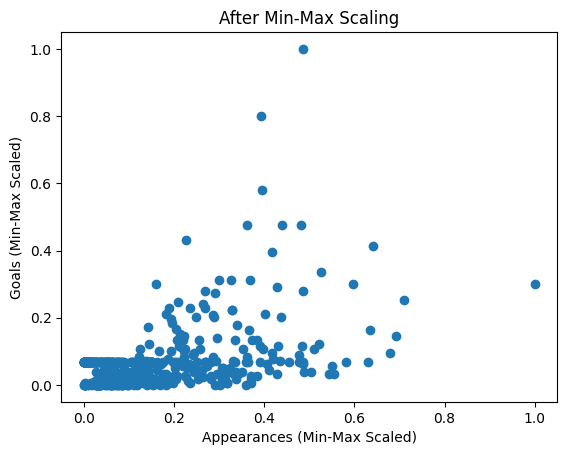

In [132]:
#After Min-Max Scaling
plt.figure()
plt.scatter(df_minmax['Appearances'], df_minmax['Goals'])
plt.xlabel('Appearances (Min-Max Scaled)')
plt.ylabel('Goals (Min-Max Scaled)')
plt.title('After Min-Max Scaling')
plt.show()


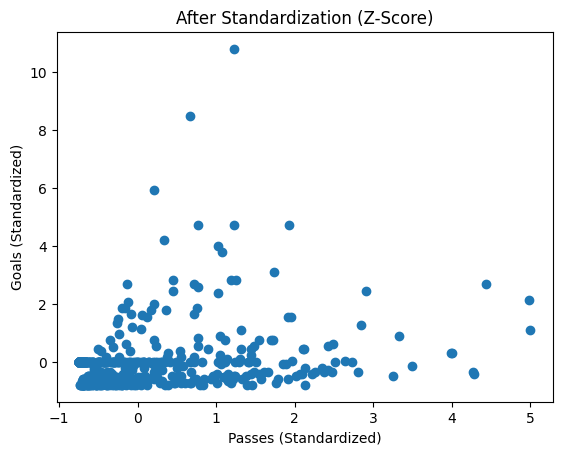

In [133]:
#After Standardization
plt.figure()
plt.scatter(df_standard['Passes'], df_standard['Goals'])
plt.xlabel('Passes (Standardized)')
plt.ylabel('Goals (Standardized)')
plt.title('After Standardization (Z-Score)')
plt.show()




#  WEEK 6



In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)


# TRAIN–TEST SPLIT
Regression Target: Goals (player performance)

Classification Target: Match_Result (Win/Draw/Loss)


In [135]:
reg_features = ['Appearances', 'Shots', 'Assists', 'Passes']
reg_target = 'Goals'

X_reg = df[reg_features]
y_reg = df[reg_target]

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Regression split done")


Regression split done


Classification Split

In [137]:
# Create a simple performance score
df['Performance_Score'] = df['Goals'] + 0.5*df['Assists'] + 0.1*df['Shots']

# Create Match_Result based on score
df['Match_Result'] = pd.cut(
    df['Performance_Score'],
    bins=[-1, 1, 3, df['Performance_Score'].max()],
    labels=['Loss', 'Draw', 'Win']
)

print(df[['Goals', 'Assists', 'Shots', 'Match_Result']].head())
clf_features = ['Goals', 'Assists', 'Shots', 'Passes']
clf_target = 'Match_Result'

X_clf = df[clf_features]
y_clf = df[clf_target]

from sklearn.model_selection import train_test_split

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

print("✔ Classification split done")



   Goals  Assists  Shots Match_Result
0     13        9    119          Win
1     13        9    119          Win
2     13        9    119          Win
3      7       18    119          Win
4      1        1    119          Win
✔ Classification split done


# 2) BASELINE MODELS


🔹 2A) Linear Regression (Player Performance)



In [138]:
lin_reg = LinearRegression()
lin_reg.fit(X_reg_train, y_reg_train)

y_reg_pred = lin_reg.predict(X_reg_test)


🔹 2B) Logistic Regression (Match Outcome)

In [139]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_clf_train, y_clf_train)

y_clf_pred = log_reg.predict(X_clf_test)


# 3) MODEL EVALUATION

🔹 Regression Metrics

In [140]:
mae = mean_absolute_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
r2 = r2_score(y_reg_test, y_reg_pred)

print("Regression Metrics:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


Regression Metrics:
MAE: 4.8452918756052785
RMSE: 6.824807952343645
R²: 0.6028063691964465


🔹 Classification Metrics

In [141]:
accuracy = accuracy_score(y_clf_test, y_clf_pred)
precision = precision_score(y_clf_test, y_clf_pred, average='weighted')
recall = recall_score(y_clf_test, y_clf_pred, average='weighted')
f1 = f1_score(y_clf_test, y_clf_pred, average='weighted')

print("Classification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Classification Metrics:
Accuracy: 0.991304347826087
Precision: 0.9826843100189036
Recall: 0.991304347826087
F1 Score: 0.9869755078792481


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision is ill-defined and being set to 0.0 in labels with no predicted samples.”

This means:

Your classifier never predicted one of the classes (usually Draw)

So precision for that class is undefined

sklearn warns you, but still computes the overall weighted score



📌 This happens often when:

Classes are imbalanced

You created Match_Result manually

Model strongly predicts only Win or Loss

# 4) VISUALIZATION

🔹 Actual vs Predicted (Regression)

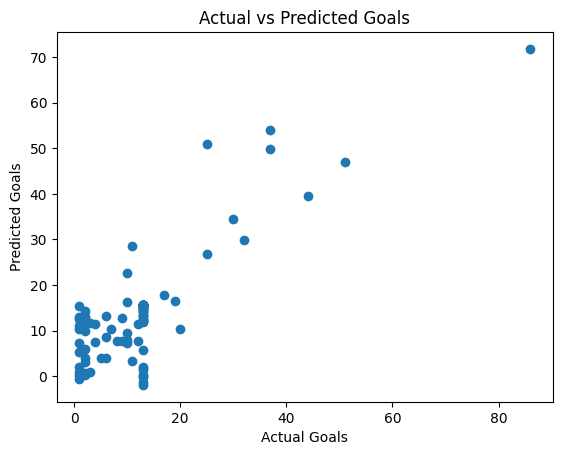

In [142]:
plt.figure()
plt.scatter(y_reg_test, y_reg_pred)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals")
plt.show()


🔹 Confusion Matrix (Classification)

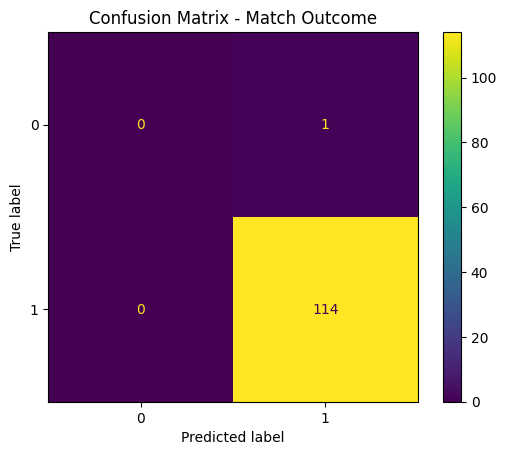

In [143]:
cm = confusion_matrix(y_clf_test, y_clf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Match Outcome")
plt.show()


# 5) ADVANCED MODELS

🔹 5A) Random Forest Regressor

In [144]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_reg_train, y_reg_train)

rf_pred = rf_reg.predict(X_reg_test)

print("RF R²:", r2_score(y_reg_test, rf_pred))


RF R²: 0.7055614750081567


🔹 5B) Gradient Boosting Classifier

In [145]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_clf_train, y_clf_train)

gb_pred = gb_clf.predict(X_clf_test)

print("GB Accuracy:", accuracy_score(y_clf_test, gb_pred))


GB Accuracy: 1.0


#  6) HYPERPARAMETER TUNING

🔹 Random Forest (GridSearch)

In [146]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='r2'
)

grid_rf.fit(X_reg_train, y_reg_train)

print("Best RF Params:", grid_rf.best_params_)


Best RF Params: {'max_depth': None, 'n_estimators': 50}


# 7) PERFORMANCE COMPARISON

In [147]:
print("Model Comparison")
print("Linear Regression R²:", r2)
print("Random Forest R²:", r2_score(y_reg_test, rf_pred))

print("Logistic Accuracy:", accuracy)
print("Gradient Boosting Accuracy:", accuracy_score(y_clf_test, gb_pred))


Model Comparison
Linear Regression R²: 0.6028063691964465
Random Forest R²: 0.7055614750081567
Logistic Accuracy: 0.991304347826087
Gradient Boosting Accuracy: 1.0
